In [25]:
import pandas as pd
import openpyxl
import numpy as np

In [29]:
data_all = pd.read_excel("../../Data/Données_origine_avec_population.xlsx", header=None)
data2 = data_all.drop(data_all.index[:5])

#On enlève les villes dont la population est supéraieur à 1 000 habitants
data = data2.drop(data2[data2[2] > 200].index)

#On garde les deux colonnes qui nous intéressent
data = data[[data.columns[2], data.columns[5]]]
data = data.replace('N/A - résultat non disponible', np.nan)
data_clean = data.dropna()


C:\Users\mbrei\AppData\Local\Temp\ipykernel_7196\3955606802.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('N/A - résultat non disponible', np.nan)


In [30]:
data_clean

,2,5
6,178,22990.0
11,119,17800.0
30,171,23800.0
34,117,25500.0
40,162,16800.0
...,...,...
407,146,19600.0
411,122,22270.0
416,142,20490.0
419,163,16900.0


In [31]:
from sklearn.linear_model import LinearRegression

# Reshape the data to the format required by sklearn
X = data_clean.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data_clean.iloc[:, 1].values.reshape(-1, 1)

# Create a LinearRegression object
lm = LinearRegression()

# Fit the model to the data
lm.fit(X, Y)

LinearRegression()

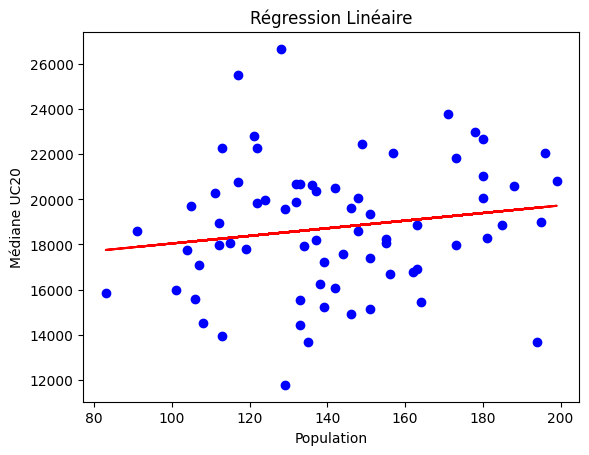

In [32]:
import matplotlib.pyplot as plt

# Plot the actual data
plt.scatter(X, Y, color='blue')

# Plot the regression line
plt.plot(X, lm.predict(X), color='red')

plt.title('Régression Linéaire')
plt.xlabel('Population')
plt.ylabel('Médiane UC20')
plt.show()

In [33]:
#Moyenne 
data_clean[5].mean()

18750.428571428572

In [34]:
import numpy as np
#Liste des valeurs manquante
data_na = data[data[5].isna()]

#On prédit les valeurs manquantes
Y_pred = lm.predict(data_na[[2]]).reshape(-1)
Y_pred = np.ceil(Y_pred).astype(int)

data_na.iloc[:,1] = Y_pred
data_na

,2,5
10,80,17707.0
20,82,17740.0
21,75,17622.0
23,62,17403.0
24,34,16931.0
...,...,...
410,26,16796.0
413,97,17993.0
415,65,17454.0
420,86,17808.0


In [35]:
for index in data_na.index:
    data2.loc[index,5] = data_na.loc[index,5]
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
5,11001,Aigues-Vives,554,53.87,413451,17770,89.4,9.8,50,19.5,36.8,95,3.323333,3,15,0,16.2,14.5,N/A - résultat non disponible
6,11002,Airoux,178,30.97,139410,22990,93.8,0,33.3,46.7,18,64,3.018333,7,15,11.2,11.2,12.5,N/A - résultat non disponible
7,11003,Ajac,202,38,141594,21770,93.6,0,40,21.6,26.9,241,13.401667,3,15,5.6,13.9,17,N/A - résultat non disponible
8,11004,Alaigne,337,24.31,192021,18460,88.4,16.1,60,25.9,28.9,245,3.753333,3,15,1.8,14.3,14.4,N/A - résultat non disponible
9,11005,Alairac,1396,81.73,754568,21650,96.6,9.2,58.7,30.7,18.5,67,2.888333,3,7,8.2,10.3,12,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,11437,Villesèquelande,914,168.04,471039,21960,96.3,7.8,18.5,28,20.7,64,3.943333,3,7,4.4,17.2,9.6,4.18
434,11438,Villesiscle,383,69.78,219063,21110,95.1,9.9,36.4,28.7,20.8,81,6.978333,3,3,0,16.7,6.6,N/A - résultat non disponible
435,11439,Villespy,424,63.95,228511,20450,93.5,10.8,37.5,27.7,20.2,72,5.735,7,15,13.2,8.7,17.4,N/A - résultat non disponible
436,11440,Villetritouls,34,6.97,27430,16931.0,105,0,N/A - division par 0,29.4,23.5,N/A - division par 0,4.253333,3,30,0,0,9.1,N/A - résultat non disponible


In [184]:
data2.to_excel("remplaceNA.xlsx", index=False, header=False)